# Лабораторная работа №1

**Многослойный перцептрон**



В PyTorch изучаемые параметры (т. е. веса и смещения) модели содержатся в параметрах torch.nn.Module модели (доступ к которым осуществляется с помощью ).
State_dict — это просто объект словаря Python, который сопоставляет каждый слой со своим тензором параметров .
Только слои с обучаемыми параметрами (сверточные слои, линейные слои и т. д.) и зарегистрированными буферами (running_mean пакета Batchnorm) имеют записи в state_dict модели . Объекты оптимизатора ( ) также имеют state_dict , который содержит информацию о состоянии оптимизатора, а также об используемых гиперпараметрах.model.parameters()torch.optim

Поскольку объекты state_dict представляют собой словари Python, их можно легко сохранять, обновлять, изменять и восстанавливать.

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.optim import SGD
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Инициализация модели
model = TheModelClass()

# инициализация оптимизатора
optimizer = SGD(model.parameters(), lr=0.01)

# Вывод словаря модели
print("Вывод словаря модели:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Вывод словаря оптимизатора
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Вывод словаря модели:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


Сохранение и загрузка модели для вывода

torch.save(model.state_dict(), PATH)

## Чтение данных и dataset

Из встроенных датасетов torchvision загрузите тестовую и обучающую выборки из MNIST, указав преобразование для изображений используя ToTensor().

In [ ]:
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

# Настройки для графиков
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Загрузка данных

Из встроенных датасетов torchvision загрузите тестовую и обучающую выборки из MNIST, указав приобразование для изображений используя ToTensor().

https://pytorch.org/vision/main/generated/torchvision.datasets.EMNIST.html

In [ ]:
train_set = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

In [ ]:
test_set = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
test_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

Выведите информацию о количестве данных в обеих выборках, размерностях изображений, количестве классов и сами метки классов.

Функция dir() в python возвращает список допустимых атрибутов объекта, что может вам подсказать как получить часть информации о датасете.
Датасеты позволяют получить общее количество объектов с помощью функции `len`, также - объект с классом по индексу. В атрибуте `classes` хранятся ярлыки классов.

In [ ]:
train_set.data.shape

torch.Size([60000, 28, 28])

In [ ]:
dir(train_set)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [ ]:
train_samples_len = len(train_set)
test_samples_len = len(test_set)
image_shape = train_set.data.shape
classes_len = len(train_set.classes)
classes_labels = train_set.classes

print(train_samples_len, test_samples_len, image_shape, classes_len, classes_labels)

60000 10000 torch.Size([60000, 28, 28]) 10 ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


Вывод 9 экземпляров

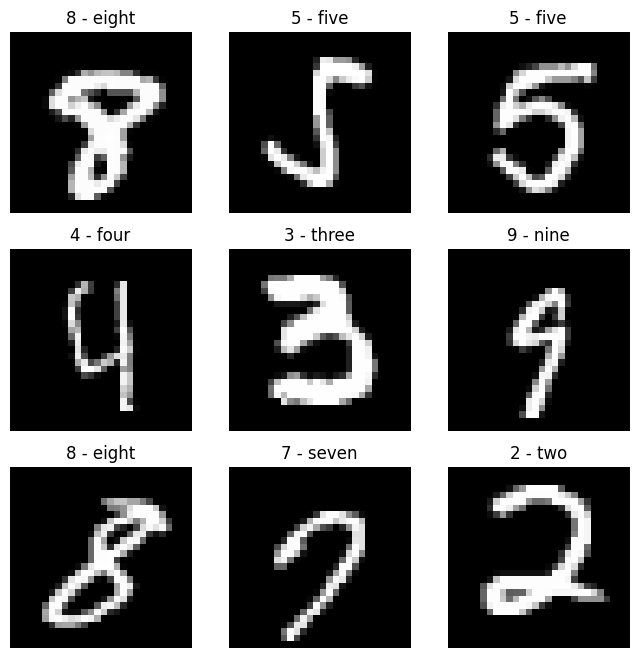

In [ ]:
labels_map = dict(zip(range(len(train_set.classes)), train_set.classes))
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


## Создание dataloader

Данные при обучении модели редко передаются по одному образцу или все разом, обычно образцы объединяются в пакеты (batches) и уже они передаются на вход модели.

Размер пакета (batch size) выбирается как $2^n$ (16, 32, 64, 128) .

Загрузчики данных будут использоваться при обучении и тестировании модели. Чтобы между эпохами модель на обучалась на одинаковых пакетах их перемешивают (shuffle).

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_loader = DataLoader(train_set, 32, shuffle=True)
test_loader = DataLoader(test_set, 32, shuffle=False)

## Создание модели
В этой работе будеут использованы контейнеры pytorch для построения нейронной сети, например `nn.Sequential` или `nn.Module`.

В этой работе, используя функции из модуля `torch.nn.functional` `linear` и `relu`, необходимо собрать цепочку вычислений для получения выходных значений.
При инициализации MLP необходимо создать несколько линейных слоев и использовать функцию активации (например ReLU), которые будут использоваться при прямом проходе в модели. Перед входным слоем необходимо использовать для изображений `.flatten()'.

- Линейный слой `nn.Linear`.
- Функция активации `nn.ReLU`

In [ ]:
import torch.nn as nn

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ComplexMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(128 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)

        self.dropout = nn.Dropout(p=0.5)

        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm1d(512)
        self.bn5 = nn.BatchNorm1d(256)
        self.bn6 = nn.BatchNorm1d(128)
        self.bn7 = nn.BatchNorm1d(64)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))

        x = x.view(-1, 128 * 3 * 3)

        x = F.relu(self.bn4(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn5(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn6(self.fc3(x)))
        x = self.dropout(x)
        x = F.relu(self.bn7(self.fc4(x)))
        x = self.dropout(x)

        x = self.fc5(x)
        return x

In [ ]:
model = ComplexMLP()

In [ ]:
print(model)

ComplexMLP(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm1d(512, eps=1e-05, momentum=0.1, af

In [ ]:
for param in model.parameters(): # вывод параметров модели
  print(param.shape)

torch.Size([32, 1, 3, 3])
torch.Size([32])
torch.Size([64, 32, 3, 3])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([512, 1152])
torch.Size([512])
torch.Size([256, 512])
torch.Size([256])
torch.Size([128, 256])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])
torch.Size([32])
torch.Size([32])
torch.Size([64])
torch.Size([64])
torch.Size([128])
torch.Size([128])
torch.Size([512])
torch.Size([512])
torch.Size([256])
torch.Size([256])
torch.Size([128])
torch.Size([128])
torch.Size([64])
torch.Size([64])


In [ ]:
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

conv1.weight 	 torch.Size([32, 1, 3, 3])
conv1.bias 	 torch.Size([32])
conv2.weight 	 torch.Size([64, 32, 3, 3])
conv2.bias 	 torch.Size([64])
conv3.weight 	 torch.Size([128, 64, 3, 3])
conv3.bias 	 torch.Size([128])
fc1.weight 	 torch.Size([512, 1152])
fc1.bias 	 torch.Size([512])
fc2.weight 	 torch.Size([256, 512])
fc2.bias 	 torch.Size([256])
fc3.weight 	 torch.Size([128, 256])
fc3.bias 	 torch.Size([128])
fc4.weight 	 torch.Size([64, 128])
fc4.bias 	 torch.Size([64])
fc5.weight 	 torch.Size([10, 64])
fc5.bias 	 torch.Size([10])
bn1.weight 	 torch.Size([32])
bn1.bias 	 torch.Size([32])
bn1.running_mean 	 torch.Size([32])
bn1.running_var 	 torch.Size([32])
bn1.num_batches_tracked 	 torch.Size([])
bn2.weight 	 torch.Size([64])
bn2.bias 	 torch.Size([64])
bn2.running_mean 	 torch.Size([64])
bn2.running_var 	 torch.Size([64])
bn2.num_batches_tracked 	 torch.Size([])
bn3.weight 	 torch.Size([128])
bn3.bias 	 torch.Size([128])
bn3.running_mean 	 torch.Size([128])
bn3.running_var 	 torch.S

**Сколько параметров в вашей модели?**

Ваш ответ: 857506

## Функция потерь и оптимизатор

В задаче классификации чаще всего используется функция потерь на основе перекрестной энтропии.

В качестве оптимизатора для параметров модели можно выбрать стохастический градиентный спуск или Adam.

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
from torch.optim import SGD

LR = 0.01

optimizer = SGD(model.parameters(), lr=LR)

## Цикл обучения

In [ ]:
import torch.nn.functional as F

n_epochs = 10

best_acc = 0

for epoch in range(n_epochs):
  train_loss = 0
  train_correct = 0
  test_loss = 0
  test_correct = 0
  print(f"Эпоха №{epoch+1}")
  model.train() # переключение модели в режим обучения
  for imgs, labels in train_loader:
    #
    # Классический цикл обучения
    # 1. Обнуление градиентов с помощью метода zero_grad у оптимизатора
    # 2. Получение вывода модели по пакету данных
    # 3. Вычисление потерь на основе вывода модели и исходных значений
    # 4. Вычисление градиентов для параметров
    # 5. Обновление параметров с помощью шага ".step()" у оптимизатора
    # 6. Вычисление метрики
        optimizer.zero_grad() # 1. Обнуление градиентов с помощью метода zero_grad у оптимизатора
        outputs = model(imgs)  # 2. Получение вывода модели по пакету данных
          # outputs = model(imgs.flatten(start_dim=1))
        loss = loss_fn(outputs, labels)  # 3. Вычисление потерь на основе вывода модели и исходных значений
        loss.backward()  # 4. Вычисление градиентов для параметров
        optimizer.step()  # 5. Обновление параметров с помощью шага ".step()" у оптимизатора
    # 6. Вычисление метрики

        train_loss += loss.item() # прибавьте потери с этой итерации
    # метод .item() - возвращает значение этого тензора
    # в виде стандартного числа Python.
        train_correct += (torch.argmax(outputs, dim=1) == labels).sum().item()
  # train_correct += torch.sum(torch.argmax(outputs, dim=1) == labels).item() # Необходимо получить сумму совпавщих значений между исходными индексами классов (labels)
    # и индексами максимальных значений в пакетах данных.
    # Вам пригодятся torch.sum, torch.argmax и .item()

  avg_train_loss = train_loss / len(train_loader) # полученную сумму потерь необходимо разделить на количество пакетов данных len(train_loader)
  train_acc = train_correct / len(train_set) # полученное количество правильно классифицированных изображений
  # необходимо разделить на количество изображений в обучающей выборке
  print(f"Потери на обучающей выборке {avg_train_loss:.5f}")
  print(f"Точность на обучающей выборке: {train_acc*100:.2f}%")


  model.eval() # переключение модели в режим оценивания
  for imgs, labels in test_loader:
    with torch.no_grad(): # работа в контексте отключенного вычисления градиентов
      # Для оценки модели:
      outputs = model(imgs) # 1. Получение вывода модели по пакету данных
      loss = loss_fn(outputs, labels)# 2. Вычисление потерь на основе вывода модели и исходных значений
      # 3. Вычисление метрики


      test_loss += loss.item()
      test_correct += torch.sum(torch.argmax(outputs, dim=1) == labels).item()

  avg_test_loss = test_loss / len(test_loader)
  test_acc =  test_correct / len(test_set)
  print(f"Потери на тестовой выборке {avg_test_loss:.5f}")
  print(f"Точность на тестовой выборке: {test_acc*100:.2f}%")

  if test_acc > best_acc:
    best_acc = test_acc
    torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            }, "best_model_params.pth")

Эпоха №1
Потери на обучающей выборке 0.78957
Точность на обучающей выборке: 78.45%
Потери на тестовой выборке 0.07104
Точность на тестовой выборке: 98.37%
Эпоха №2
Потери на обучающей выборке 0.24977
Точность на обучающей выборке: 94.37%
Потери на тестовой выборке 0.04482
Точность на тестовой выборке: 98.81%
Эпоха №3
Потери на обучающей выборке 0.18279
Точность на обучающей выборке: 95.90%
Потери на тестовой выборке 0.03165
Точность на тестовой выборке: 99.07%
Эпоха №4
Потери на обучающей выборке 0.14894
Точность на обучающей выборке: 96.62%
Потери на тестовой выборке 0.03132
Точность на тестовой выборке: 99.05%
Эпоха №5
Потери на обучающей выборке 0.12744
Точность на обучающей выборке: 97.16%
Потери на тестовой выборке 0.03365
Точность на тестовой выборке: 99.10%
Эпоха №6
Потери на обучающей выборке 0.11151
Точность на обучающей выборке: 97.47%
Потери на тестовой выборке 0.02714
Точность на тестовой выборке: 99.24%
Эпоха №7
Потери на обучающей выборке 0.09874
Точность на обучающей выб

Для оценки модели нужно отключать вычисление градиентов `with torch.no_grad()`?**



## Загрузка модели и инференс

Проверка модели на цифрах.

Необходимо нарисовать цифру в любом графическом редакторе (Paint, Gimp, Photoshop).

Изображение должно быть черно-белое, ширина и высота 28 px, черный фон, белая цифра. Формат  png, jpg.

Для загрузки изображения в Google Colab в боковой панели откройте Files (1), и выберите вариант Upload to session storage (2).

Затем файл необходимо считать и подготовить перед тем, как передать в модель.



In [ ]:
from PIL import Image
img = Image.open('1_negate (1).png')
print(f"Ширина и высота {img.size}, количество каналов {len(img.mode)}")
img

Ширина и высота (28, 28), количество каналов 1


In [ ]:
import torchvision.transforms as transforms
# Раскомментируйте, если цветное изображение
# transform_grayscale = transforms.Grayscale()
# img = transform_grayscale(img)

# Преобразования изображения
transform_to_tensor = transforms.ToTensor()
x = transform_to_tensor(img)

# Выведите размерности тензора x
x.shape

torch.Size([1, 28, 28])

Модель строилась с использованием пакетов данных, которые создавали экземпляры класса DataLoader, для использования одного изображения нужно создать пакет из одного изображения с использованием  метода тензора `unsqueeze` или `unsqueeze_`.

In [ ]:
x = torch.unsqueeze(x, 1)

In [ ]:
best_model = ComplexMLP()# Новый экземпляр класса модели
best_model_params = torch.load("best_model_params.pth") # Укажите путь до сохраненного файла
state_dict = best_model_params['model_state_dict']# Из best_model_params извлеките по соответствующему ключу параметры модели
# Для best_model используйте метод load_state_dict и передайте в него словарь с параметрами.
# Переключите модель в режим проверки

best_model.load_state_dict(state_dict)
best_model.eval()

<ipython-input-71-dbc638b35d56>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model_params = torch.load("best_model_params.pth") # Укажите путь до сохраненного файла

ComplexMLP(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm1d(512, eps=1e-05, momentum=0.1, af

Тестирование модели
 Передайте на вход модели подготовленный тензор. Из вывода модели получите индекс наибольшего значения (`argmax`) и по индексу получите результат из массива ярлыков классов (`test_set.classes`).

In [ ]:
with torch.no_grad():
    output = best_model(x)

predicted_index = torch.argmax(output, dim=1).item()
predicted_class = test_set.classes[predicted_index]

print(f"Предсказанный класс: {predicted_class}")

Предсказанный класс: 1 - one


**Правильно ли предсказала модель цифру?**

Ваш ответ: Да

**Лучшая точность на тестовой выборке для вашей модели.**

Ваш ответ: 99.34%




## Задание 1.

1. Подбор гиперпараметров
Используя рабочий код модели и ее обучения, используйте разные варианты скорости обучения, количества параметров в скрытых слоя модели, количества эпох, размера батчей.
2. Выведите гиперпараметры лучшей  модели.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split


class ComplexMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(128 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)

        self.dropout = nn.Dropout(p=0.5)

        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm1d(512)
        self.bn5 = nn.BatchNorm1d(256)
        self.bn6 = nn.BatchNorm1d(128)
        self.bn7 = nn.BatchNorm1d(64)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))

        x = x.view(-1, 128 * 3 * 3)

        x = F.relu(self.bn4(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn5(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn6(self.fc3(x)))
        x = self.dropout(x)
        x = F.relu(self.bn7(self.fc4(x)))
        x = self.dropout(x)

        x = self.fc5(x)
        return x


def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_val_acc = 0.0
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        val_acc = val_correct / val_total

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")

    return best_val_acc

train_size = int(0.8 * len(train_set))
val_size = len(train_set) - train_size
train_set, val_set = random_split(train_set, [train_size, val_size])


learning_rates = [0.001, 0.01, 0.1]
hidden_sizes = [64, 128, 256]
batch_sizes = [32, 64, 128]
num_epochs_list = 2

best_hyperparams = {}
best_accuracy = 0.0

for lr in learning_rates:
    for hidden_size in hidden_sizes:
        for batch_size in batch_sizes:
              print(f"Testing: lr={lr}, hidden_size={hidden_size}, batch_size={batch_size}, epochs={2}")

              train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
              val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)

              model = MLP(hidden_size)
              criterion = nn.CrossEntropyLoss()
              optimizer = optim.Adam(model.parameters(), lr=lr)

              val_acc = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs_list)

              if val_acc > best_accuracy:
                  best_accuracy = val_acc
                  best_hyperparams = {
                      "learning_rate": lr,
                      "hidden_size": hidden_size,
                      "batch_size": batch_size,
                      "num_epochs": num_epochs_list,
                  }

              print(f"Validation Accuracy: {val_acc:.4f}")

print("\nBest Hyperparameters:")
print(best_hyperparams)
print(f"Best Validation Accuracy: {best_accuracy:.4f}")

Testing: lr=0.001, hidden_size=64, batch_size=32, epochs=2
Validation Accuracy: 0.9515
Testing: lr=0.001, hidden_size=64, batch_size=64, epochs=2
Validation Accuracy: 0.9437
Testing: lr=0.001, hidden_size=64, batch_size=128, epochs=2
Validation Accuracy: 0.9370
Testing: lr=0.001, hidden_size=128, batch_size=32, epochs=2
Validation Accuracy: 0.9597
Testing: lr=0.001, hidden_size=128, batch_size=64, epochs=2
Validation Accuracy: 0.9602
Testing: lr=0.001, hidden_size=128, batch_size=128, epochs=2
Validation Accuracy: 0.9537
Testing: lr=0.001, hidden_size=256, batch_size=32, epochs=2
Validation Accuracy: 0.9736
Testing: lr=0.001, hidden_size=256, batch_size=64, epochs=2
Validation Accuracy: 0.9653
Testing: lr=0.001, hidden_size=256, batch_size=128, epochs=2
Validation Accuracy: 0.9650
Testing: lr=0.01, hidden_size=64, batch_size=32, epochs=2
Validation Accuracy: 0.9437
Testing: lr=0.01, hidden_size=64, batch_size=64, epochs=2
Validation Accuracy: 0.9493
Testing: lr=0.01, hidden_size=64, ba

## Задание 2.

1. Из встроенных датасетов torchvision загрузите тестовую и обучающую выборки из EMNIST часть (split) Balanced или Letters.
2. Постройте код модели и ее обучения, используйте разные варианты скорости обучения, количества параметров в скрытых слоя модели, количества эпох, размера батчей.
2. Выведите гиперпараметры лучшей модели.


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader


split_type = 'balanced'
num_classes = 47 if split_type == 'balanced' else 26


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


trainset = torchvision.datasets.EMNIST(root='./data', split=split_type, train=True, download=True, transform=transform)
testset = torchvision.datasets.EMNIST(root='./data', split=split_type, train=False, download=True, transform=transform)


def get_dataloaders(batch_size):
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)
    return trainloader, testloader


class Net(nn.Module):
    def __init__(self, hidden_units=128, num_classes=47):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, hidden_units)
        self.fc2 = nn.Linear(hidden_units, hidden_units)
        self.fc3 = nn.Linear(hidden_units, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


def train_model(model, criterion, optimizer, trainloader, num_epochs=3):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(trainloader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total * 100
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy


learning_rates = [0.001, 0.01, 0.1]
hidden_units_list = [64, 128, 256]
batch_sizes = [32, 64, 128]
num_epochs = 3

best_accuracy = 0
best_params = {}


for lr in learning_rates:
    for hidden_units in hidden_units_list:
        for batch_size in batch_sizes:
            print(f"\nTraining with LR={lr}, Hidden units={hidden_units}, Batch size={batch_size}, Epochs={num_epochs}")


            model = Net(hidden_units=hidden_units, num_classes=num_classes)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            trainloader, testloader = get_dataloaders(batch_size)

            train_model(model, criterion, optimizer, trainloader, num_epochs)

            accuracy = evaluate_model(model, testloader)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'learning_rate': lr,
                    'hidden_units': hidden_units,
                    'batch_size': batch_size,
                    'epochs': num_epochs
                }

print("\nBest model parameters:", best_params)


Training with LR=0.001, Hidden units=64, Batch size=32, Epochs=3
Epoch [1/3], Loss: 1.3050
Epoch [2/3], Loss: 0.8720
Epoch [3/3], Loss: 0.7690
Test Accuracy: 75.96%

Training with LR=0.001, Hidden units=64, Batch size=64, Epochs=3
Epoch [1/3], Loss: 1.3834
Epoch [2/3], Loss: 0.9031
Epoch [3/3], Loss: 0.7782
Test Accuracy: 76.02%

Training with LR=0.001, Hidden units=64, Batch size=128, Epochs=3
Epoch [1/3], Loss: 1.5103
Epoch [2/3], Loss: 0.9854
Epoch [3/3], Loss: 0.8409
Test Accuracy: 74.45%

Training with LR=0.001, Hidden units=128, Batch size=32, Epochs=3
Epoch [1/3], Loss: 1.0860
Epoch [2/3], Loss: 0.6853
Epoch [3/3], Loss: 0.6049
Test Accuracy: 79.91%

Training with LR=0.001, Hidden units=128, Batch size=64, Epochs=3
Epoch [1/3], Loss: 1.1356
Epoch [2/3], Loss: 0.6875
Epoch [3/3], Loss: 0.5905
Test Accuracy: 80.34%

Training with LR=0.001, Hidden units=128, Batch size=128, Epochs=3
Epoch [1/3], Loss: 1.3082
Epoch [2/3], Loss: 0.7691
Epoch [3/3], Loss: 0.6428
Test Accuracy: 79.56%